# Khai báo các thư viện cần sử dụng.

In [42]:
import numpy as np
import pandas as pd
import cv2
import os
import re
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import tensorflow as tf

# Load dữ liệu MNIST.

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:60000,:], y_train[:60000]

print(X_train.shape)

(60000, 28, 28)


# Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu.

In [44]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))

print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


# Áp dụng thuật toán One hot encoding label (Y).

In [45]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Định nghĩa model.

In [5]:
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3.
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer.
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer.
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector.
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid.
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

# Compile model.

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Thực hiện train model với data.

In [7]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2284 - accuracy: 0.9359 - val_loss: 0.0565 - val_accuracy: 0.9852
Epoch 2/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0530 - accuracy: 0.9847 - val_loss: 0.0331 - val_accuracy: 0.9918
Epoch 3/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0266 - val_accuracy: 0.9925
Epoch 4/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.0145 - val_accuracy: 0.9963
Epoch 5/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.0118 - val_accuracy: 0.9977
Epoch 6/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0108 - accuracy: 0.9972 - val_loss: 0.0075 - val_accuracy: 0.9984
Epoch 7/20
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0067 -

# Đánh giá model với dữ liệu test

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04852834343910217, 0.9872000217437744]


# Lưu Model.

In [9]:
model.save('reco_digit_original.model')

INFO:tensorflow:Assets written to: reco_digit_original.model\assets


INFO:tensorflow:Assets written to: reco_digit_original.model\assets


# Model chạy sẵn.

In [46]:
# Load pre-trained model weights
model = tf.keras.models.load_model(r'E:\\TTNT\\BTL_HB_BBD\\reco_digit')

# Dự đoán kết quả với tệp Test của MNIST.

1/1 [==============================] - 0s 208ms/step


Final Output: 2


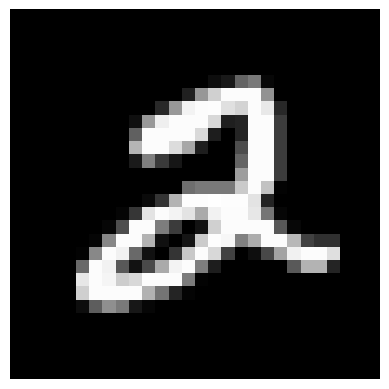

In [7]:
example = X_train[5]

prediction = model.predict(example.reshape(1, 28, 28, 1))

print("\n\nFinal Output: {}".format(np.argmax(prediction)))
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 17ms/step


Final Output: 1


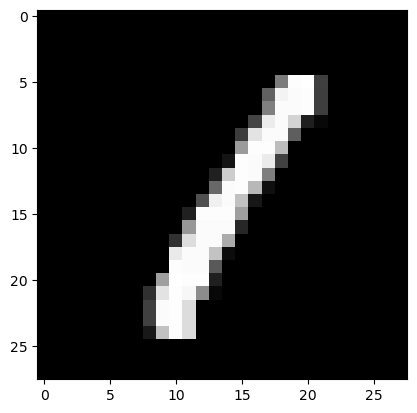

In [8]:
example = X_train[3]

prediction = model.predict(example.reshape(1, 28, 28, 1))
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()

# Sắp xếp viền theo trục x.

In [47]:
def x_cord_contour(contours):
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

# Hàm xuất data ra file.

In [48]:
def output_file(path, array):
    
    content = "\'" + ''.join([str(x) for x in array]) + "\'"

    with open(path, 'a') as f:
        if os.stat(path).st_size == 0:
            empty_df = pd.DataFrame(columns=['So_Hieu'])
            empty_df.to_csv(path, index = False)
        else:
            pass

    file = open(path, 'a')
    file.write(content+'\n')
    file.close()

# Hàm nhận dạng chữ số và xuất file.

In [49]:
def reco_digits(img):
    
    # Gaussian blur, Otsu's threshold
    blur = cv2.GaussianBlur(img, (5,5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # xử lý điểm ảnh nhỏ
    cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 800:
            cv2.drawContours(thresh, [c], -1, (0,0,0), -1)
    
    # findContour dùng để cung cấp đường viền từng chữ số trên ảnh.
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sắp xếp đường viền từ trái sang phải dựa trên hàm sắp xếp đường viền theo trục x.
    contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

    preprocessed_digits = []

    for (i,c)  in enumerate(contours_left_to_right):
        (x, y, w, h) = cv2.boundingRect(c)
        
        # tạo viền quanh chữ số trong ảnh.
        cv2.rectangle(img, (x,y), (x+w, y+h), color=(0,0,0), thickness=2)
        
        # cắt ảnh và xử lý
        digit = thresh[y:y+h, x:x+w]
        
        # chuyển về size(18,18)
        resized_digit = cv2.resize(digit, (18,18))
        
        # thêm padding 5 pixel màu đen vào 4 góc để chuyển ảnh về (28,28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        
        # lưu trữ vào preprocessed_digits
        preprocessed_digits.append(padded_digit)
    
    # Biểu diễn ảnh sau khi tìm được viền các số.
    print('original_image')
    print("\n\n\n")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Dự đoán kết quả.
    processed_digits = []
    
    for digit in preprocessed_digits:
        prediction = model.predict(digit.reshape(1, 28, 28, 1))
        processed_digits.append(np.argmax(prediction))
        
    # In các chữ số cần nhận dạng: (Kết quả)
    arr = np.array(processed_digits)
    print('Kết quả nhận dạng: ',arr)
    
    # Xuất ra file csv.
    output_file("so_hieu_bang_tot_nghiep.csv",arr)

# Hàm cắt ảnh và hiển thị kết quả từ ảnh được chọn.

In [50]:
def crop_define(path):
    
    # Đọc và biểu diễn ảnh từ đường dẫn:
    img = cv2.imread(path)
    img1 = cv2.imread(path,0)
    
    resized_img = cv2.resize(img1, (3300, 3450))
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # x,y là chỉ số tọa độ trục x và y, w là width, h là height.
    crop_img = resized_img[2680:3000, 720:1400] #[y:y+h, x:x+w]
    
    reco_digits(crop_img) # Kết quả

# Nhận dạng Ngày tháng năm sinh

In [51]:
def output_file_date(path, array):
    content = "\'" + ''.join([str(x) for x in array]) + "\'"

    with open(path, 'a') as f:
        if os.stat(path).st_size == 0:
            empty_df = pd.DataFrame(columns=['Ngay_Thang_Nam_Sinh'])
            empty_df.to_csv(path, index=False)
        else:
            pass

    file = open(path, 'a')
    file.write(content + '\n')
    file.close()

def reco_digits_date(img):
    # Gaussian blur, Otsu's threshold
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Xử lý điểm ảnh nhỏ
    cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 400:
            cv2.drawContours(thresh, [c], -1, (0, 0, 0), -1)

    # Tìm các đường viền để cung cấp biên của từng chữ số trên ảnh
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sắp xếp các đường viền từ trái sang phải dựa trên tọa độ x
    contours_left_to_right = sorted(contours, key=x_cord_contour, reverse=False)

    preprocessed_digits = []

    for (i, c)  in enumerate(contours_left_to_right):
        (x, y, w, h) = cv2.boundingRect(c)
        
        # Tạo viền quanh chữ số trong ảnh.
        cv2.rectangle(img, (x, y), (x+w, y+h), color=(0, 0, 0), thickness=2)
        
        # Cắt ảnh và xử lý
        digit = thresh[y:y+h, x:x+w]
        
        # Chuyển về size (18, 18)
        resized_digit = cv2.resize(digit, (18, 18))
        
        # Thêm padding 5 pixel màu đen vào 4 góc để chuyển ảnh về (28, 28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
        
        # Lưu trữ vào preprocessed_digits
        preprocessed_digits.append(padded_digit)

    # Biểu diễn ảnh sau khi tìm được viền các số
    print('original_image')
    print("\n\n\n")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Dự đoán kết quả
    processed_digits = []
    
    for digit in preprocessed_digits:
        prediction = model.predict(digit.reshape(1, 28, 28, 1))
        processed_digits.append(np.argmax(prediction))
    
    # Sử dụng biểu thức chính quy để ghép các chữ số thành ngày tháng năm
    result_string = ''.join(map(str, processed_digits))
    match = re.match(r'(\d{2})(\d{2})(\d{4})', result_string)

    if match:
        day, month, year = match.groups()
        date_of_birth = f"{day}/{month}/{year}"
        print('Ngày tháng năm sinh:', date_of_birth)

        # Xuất ra file csv
        output_file_date("Date of Birth.csv", [date_of_birth],)
    else:
        print('Không thể nhận diện ngày tháng năm sinh.')

def crop_define_date(path):
    # Đọc và biểu diễn ảnh từ đường dẫn
    img = cv2.imread(path)
    img1 = cv2.imread(path, 0)
    
    resized_img = cv2.resize(img1, (3300, 3450))
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # x,y là chỉ số tọa độ trục x và y, w là width, h là height
    crop_img = resized_img[1200:1350, 1400:2000]  # [y:y+h, x:x+w]
    
    reco_digits_date(crop_img)  # Kết quả

# Minh họa xử lý ảnh

original_image


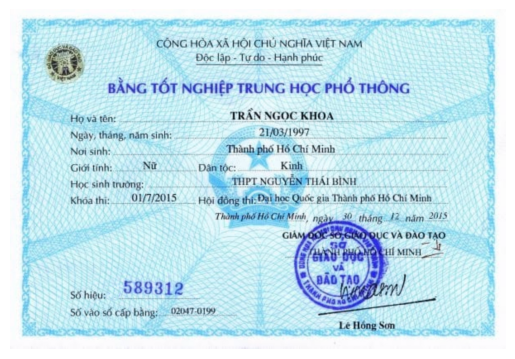



grayscale_image


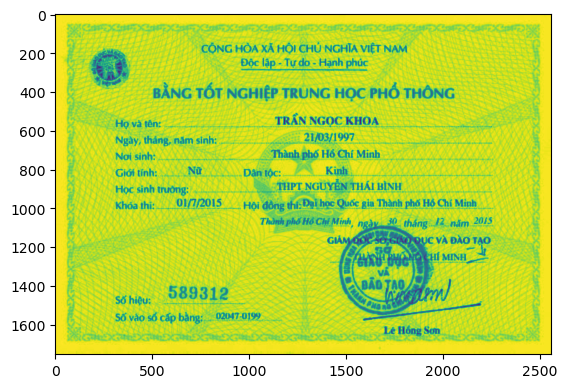



resized_image


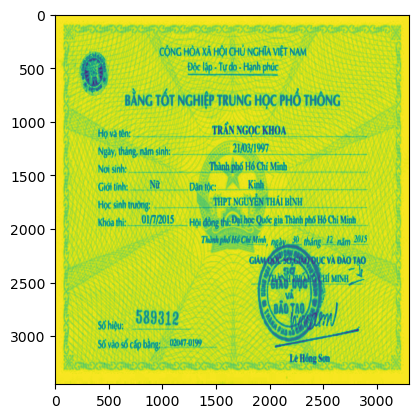



crop_image


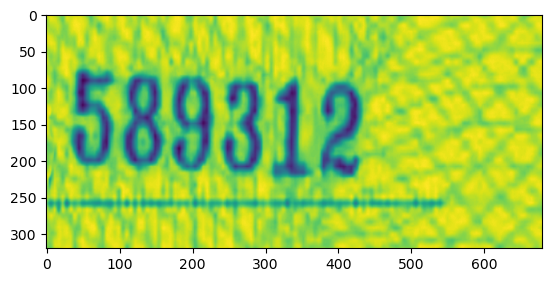



Gaussian blur


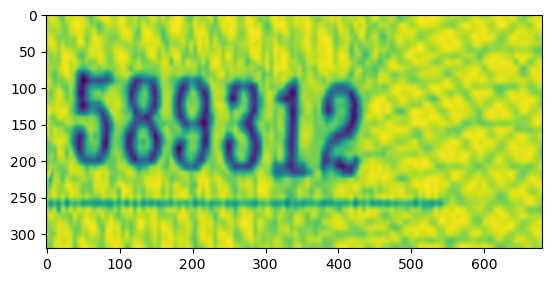



Otsu threshold


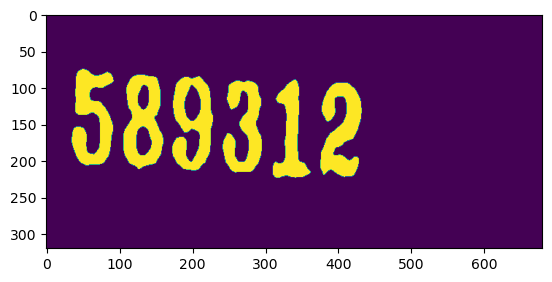

In [52]:
    img = cv2.imread(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghiep1.jpg')
    img1 = cv2.imread(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghiep1.jpg',0)
    
    resized_img = cv2.resize(img1, (3300, 3450))
    
    print('original_image')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print('\n\ngrayscale_image')
    plt.imshow(img1)
    plt.show()
    
    print('\n\nresized_image')
    plt.imshow(resized_img)
    plt.show()
    
    crop_img = resized_img[2680:3000, 720:1400]
    
    print('\n\ncrop_image')
    plt.imshow(crop_img)
    plt.show()
    
    blur = cv2.GaussianBlur(crop_img, (5,5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # xử lý điểm ảnh nhỏ
    cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 800:
            cv2.drawContours(thresh, [c], -1, (0,0,0), -1)
    
    print('\n\nGaussian blur')
    plt.imshow(blur)
    plt.show() 
    
    print('\n\nOtsu threshold')
    plt.imshow(thresh)
    plt.show()
    

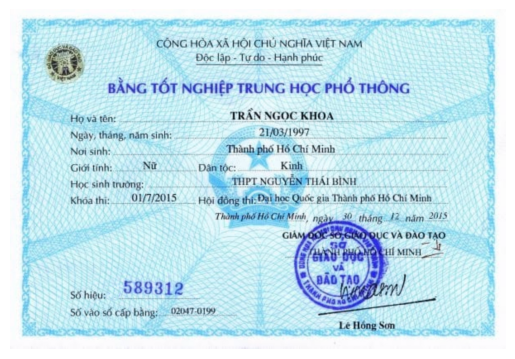

original_image






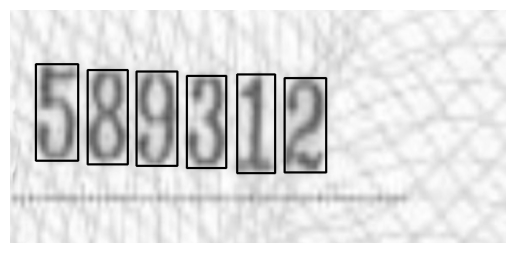

1/1 [==============================] - 0s 17ms/step
Kết quả nhận dạng:  [5 8 9 3 1 2]


In [53]:
crop_define(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghiep1.jpg')

# Test chương trình với một số bằng tốt nghiệp.

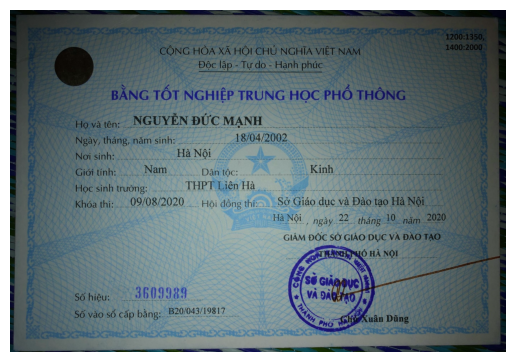

original_image






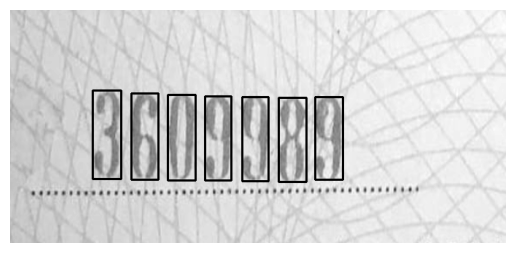

1/1 [==============================] - 0s 18ms/step
Kết quả nhận dạng:  [3 6 0 9 9 8 9]


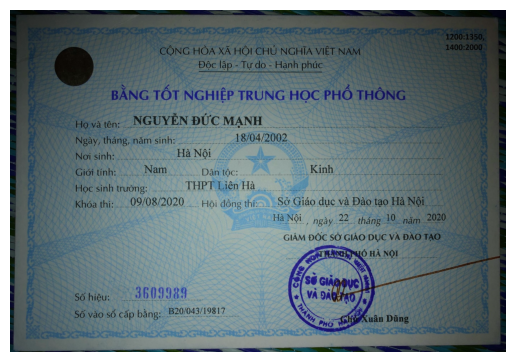

original_image






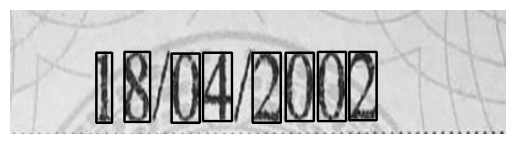

1/1 [==============================] - 0s 17ms/step
Ngày tháng năm sinh: 18/04/2002


In [32]:
crop_define(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghiep2.jpg')
crop_define_date(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghiep2.jpg')

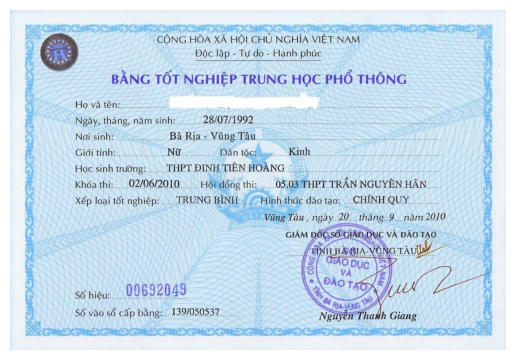

original_image






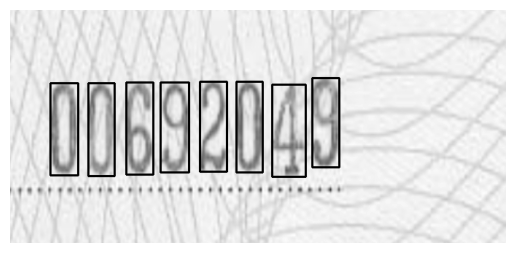

1/1 [==============================] - 0s 16ms/step
Kết quả nhận dạng:  [0 0 6 9 2 0 4 9]


In [40]:
crop_define(r'E:\\TTNT\\BTL_HB_BBD\\anhdate1.jpg')
#crop_define_date(r'E:\\TTNT\\BTL_HB_BBD\\anhdate1.jpg') 

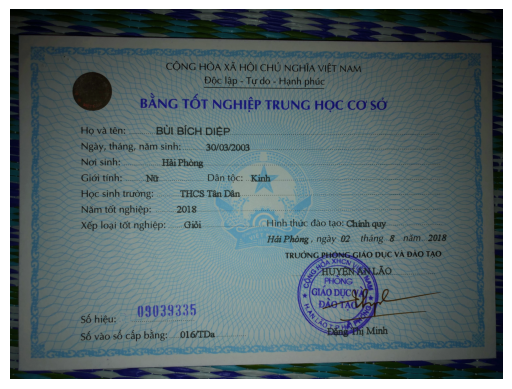

original_image






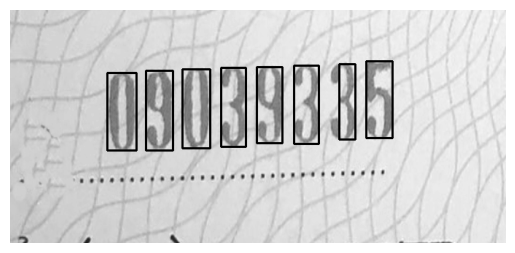

1/1 [==============================] - 0s 17ms/step
Kết quả nhận dạng:  [0 9 0 3 9 3 3 5]


In [31]:
crop_define(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghiep5.jpg')

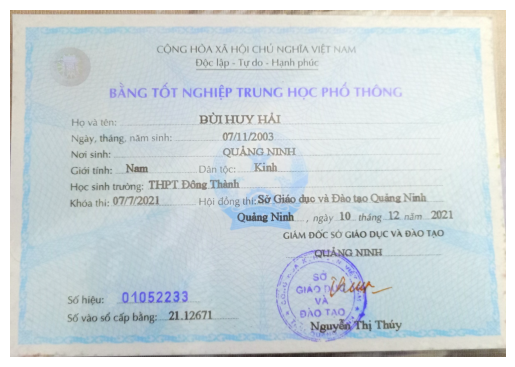

original_image






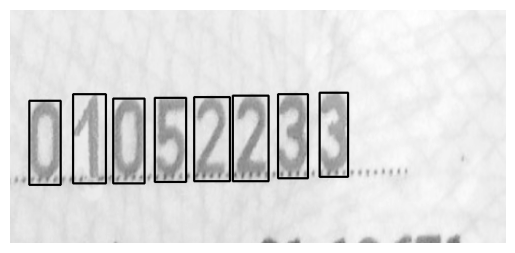

1/1 [==============================] - 0s 18ms/step
Kết quả nhận dạng:  [0 1 0 5 2 2 3 3]


In [30]:
crop_define(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghiep3.jpg')

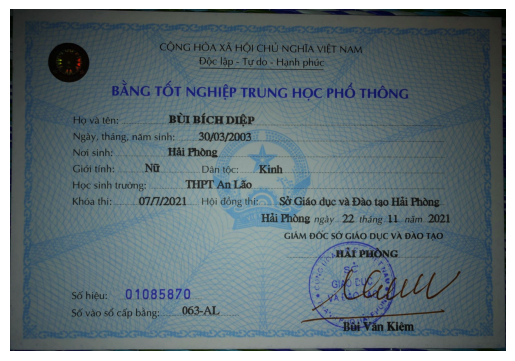

original_image






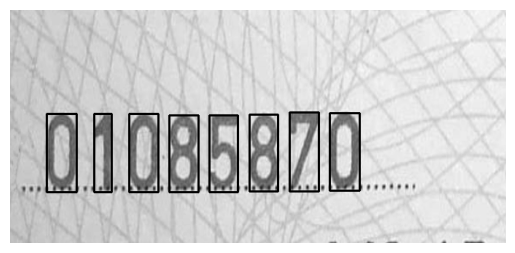

1/1 [==============================] - 0s 22ms/step
Kết quả nhận dạng:  [0 3 0 8 5 8 7 0]


In [41]:
crop_define(r'E:\\TTNT\\BTL_HB_BBD\\anhbangtotnghieploi.jpg')